# Step-1: Importing Files and Required Libraries

In [1]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

df = pd.read_csv(r'D:\EXCELR\DATA SCIENCE\Assignments\17. Text Mining\Elon_musk.csv', encoding='latin1')
df.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


# Step-2: EDA

In [2]:
df = df.drop('Unnamed: 0', axis =1)
df = df.rename(columns = {'Text': 'Tweet'}, inplace = False)
df.head()

,Tweet
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


In [4]:
df.describe()

,Tweet
count,1999
unique,1997
top,The most entertaining outcome is the most likely
freq,2


In [5]:
df.isnull().sum()

Tweet    0
dtype: int64

# Step-3: Data Cleaning

In [6]:
import re 
import string

def clean_text(text):
    
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

In [7]:
# Clean The Text
df["Tweet"] = df["Tweet"].apply(clean_text)
df.head()

,Tweet
0,im an alien
1,idaacarmack ray tracing on cyberpunk with hdr ...
2,joerogan spotify great interview
3,doge is underestimated
4,teslacn congratulations tesla china for amazin...


In [8]:
# Word frequency 
freq = pd.Series(' '.join(df['Tweet']).split()).value_counts()[:20] # for top 20
freq

the               486
to                400
a                 355
is                355
of                315
spacex            239
in                219
amp               218
for               194
tesla             166
will              165
be                157
erdayastronaut    142
this              140
it                137
we                135
on                129
that              127
rt                127
but               126
dtype: int64

In [9]:
# removing stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Tweet'] = df['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [10]:
# word frequency after removal of stopwords
freq_Sw = pd.Series(' '.join(df['Tweet']).split()).value_counts()[:20] # for top 20
freq_Sw

spacex             239
amp                218
tesla              166
erdayastronaut     142
rt                 127
ppathole           123
flcnhvy            114
yes                 86
great               76
teslaownerssv       73
wholemarsblog       68
teslarati           59
its                56
haha                55
nasaspaceflight     55
good                51
launch              49
sure                43
yeah                41
would               40
dtype: int64

# Step-4: Sentimental Analysis

In [11]:
pip install textblob

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [12]:
from textblob import TextBlob

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity


In [13]:
df['Subjectivity'] = df['Tweet'].apply(getSubjectivity)
df['Polarity'] = df['Tweet'].apply(getPolarity)

In [14]:
def getSentiment(value):
  if value < 0:
    return 'Negative'
  elif value > 0:
    return 'Positive'
  else:
    return 'Neutral'

df['Sentiment'] = df['Polarity'].apply(getSentiment)
df.head()

,Tweet,Subjectivity,Polarity,Sentiment
0,im alien,0.750000,-0.25,Negative
1,idaacarmack ray tracing cyberpunk hdr nextleve...,0.000000,0.00,Neutral
2,joerogan spotify great interview,0.750000,0.80,Positive
3,doge underestimated,0.000000,0.00,Neutral
4,teslacn congratulations tesla china amazing ex...,0.322222,0.20,Positive


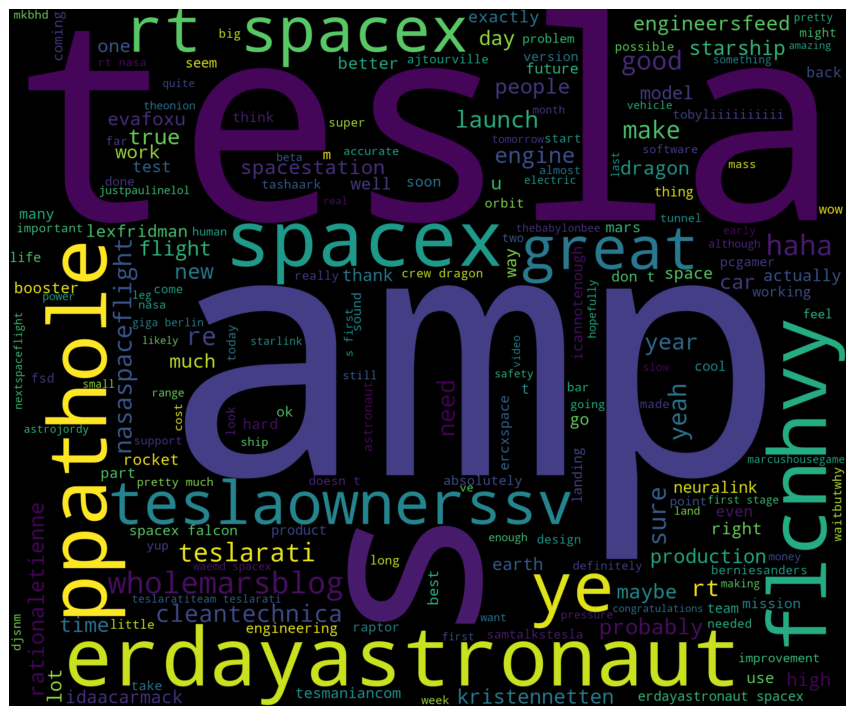

In [38]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allwords = " ".join([twts for twts in df["Tweet"]])
wordCloud = WordCloud(width = 1800, height = 1500, random_state = 21).generate(allwords)
plt.figure(figsize=(12,12), dpi=90)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

# Step-5: Visualizations

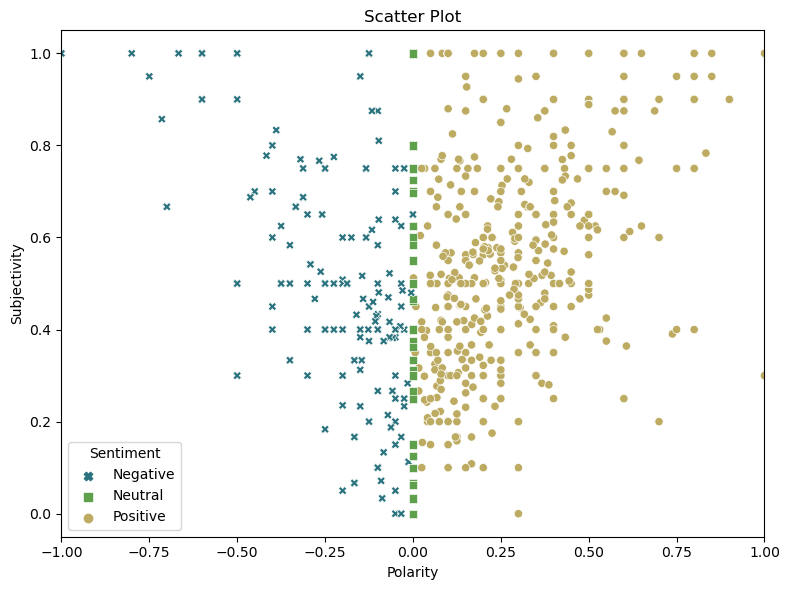

In [16]:
# Scatter Plot
plt.figure(figsize = (8,6))

markers = {'Positive':'o', 'Neutral':'s','Negative':'X'}

sns.scatterplot(data=df, x='Polarity', y='Subjectivity', hue = 'Sentiment', style = 'Sentiment', markers = markers, palette = 'gist_earth').set(xlim=(-1,1))
plt.title('Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

plt.tight_layout()


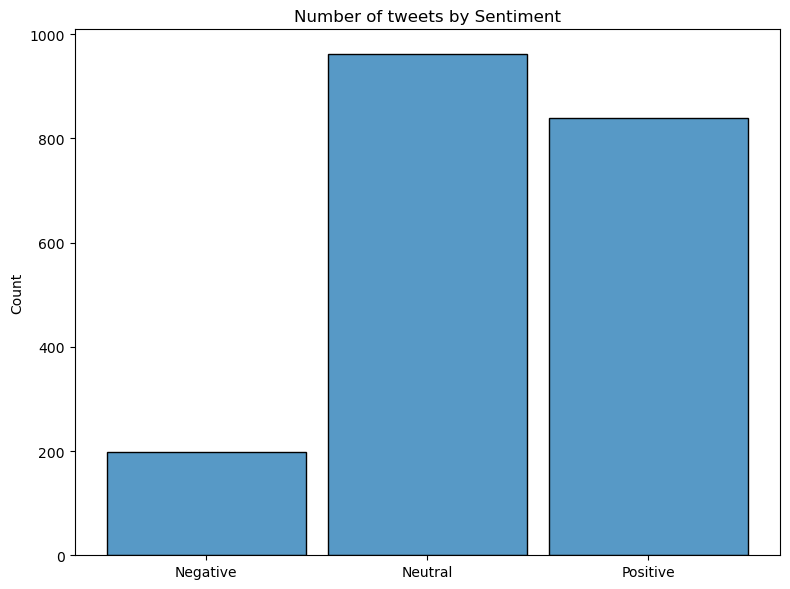

In [17]:
# Bar Plot
plt.figure(figsize = (8,6))

sns.histplot(df, x = 'Sentiment', shrink=0.9).set(xlabel = None)
plt.title('Number of tweets by Sentiment')

plt.tight_layout()

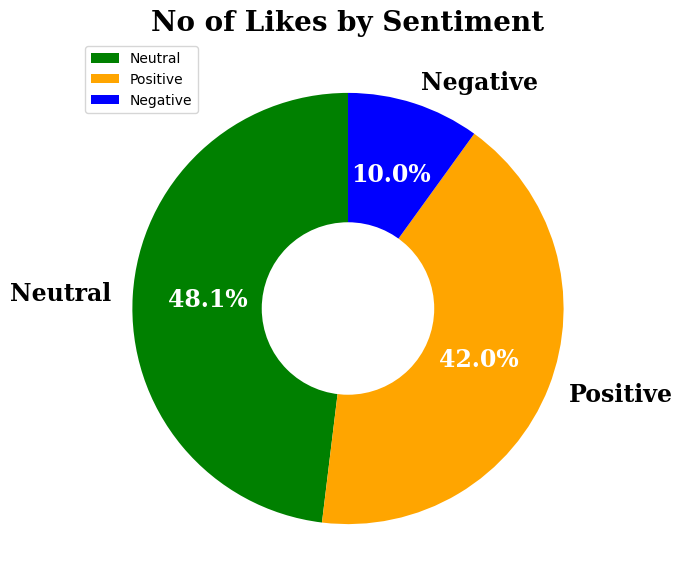

In [36]:
# Pie Chart
label_data=df['Sentiment'].value_counts()

explode=(0.1,0.1)
plt.figure(figsize=(12,7))
patches, texts, pcts= plt.pie(label_data,labels=label_data.index,colors=['green','orange','blue'],pctdistance=0.65,
                             startangle=90,autopct='%1.1f%%',
                             textprops={'fontsize':17,'color':'black','weight':'bold','family':'serif'})
plt.setp(pcts,color='white')
hfont={'weight':'bold','family':'serif'}
plt.title('No of Likes by Sentiment',size=20,**hfont)

centre_circle=plt.Circle((0,0),0.40,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(['Neutral','Positive','Negative'],loc="upper left")
plt.show()

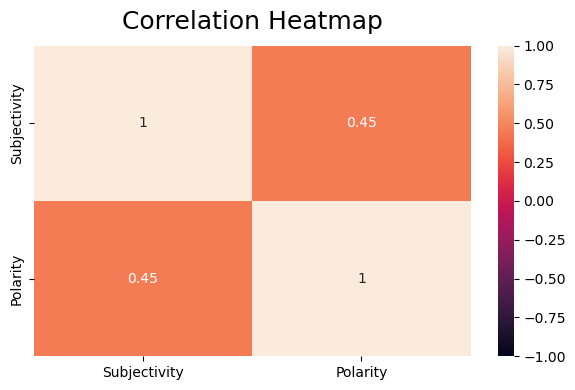

In [35]:
# Correlation

plt.figure(figsize=(6, 4))

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

plt.tight_layout()